In [1]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Importing the required Libraries

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
import sklearn.metrics as sm

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import pydot

from IPython.display import Image

In [3]:
import warnings
warnings.filterwarnings('ignore')

# Reading and Loading The Data

In [4]:
#Loading the Data

iris=pd.read_csv(r"C:\\Users\\tiwar\\Downloads\\Iris.csv")

print("Data imported successfully")

iris.head()

Data imported successfully


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Basic Data Exporation

In [5]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
iris.shape

(150, 6)

In [7]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 6.5+ KB


In [8]:
iris.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

In [9]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [10]:
iris.rename(columns={'SepalLengthCm':'SepalLength','SepalWidthCm':'SepalWidth','PetalLengthCm':'PetalLength','PetalWidthCm':'PetalWidth'}, inplace=True)

In [11]:
iris.head(55)

,Id,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [12]:
iris=iris.drop(["Id"],axis=1)

In [13]:
iris.columns

Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species'], dtype='object')

In [14]:
iris['Species'].replace({'Iris-virginica':'virginica','Iris-setosa':'setosa','Iris-versicolor':'versicolor'},inplace=True)

In [15]:
iris['Species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [16]:
iris.nunique()

SepalLength    35
SepalWidth     23
PetalLength    43
PetalWidth     22
Species         3
dtype: int64

# Visual Exploratory Data Analysis

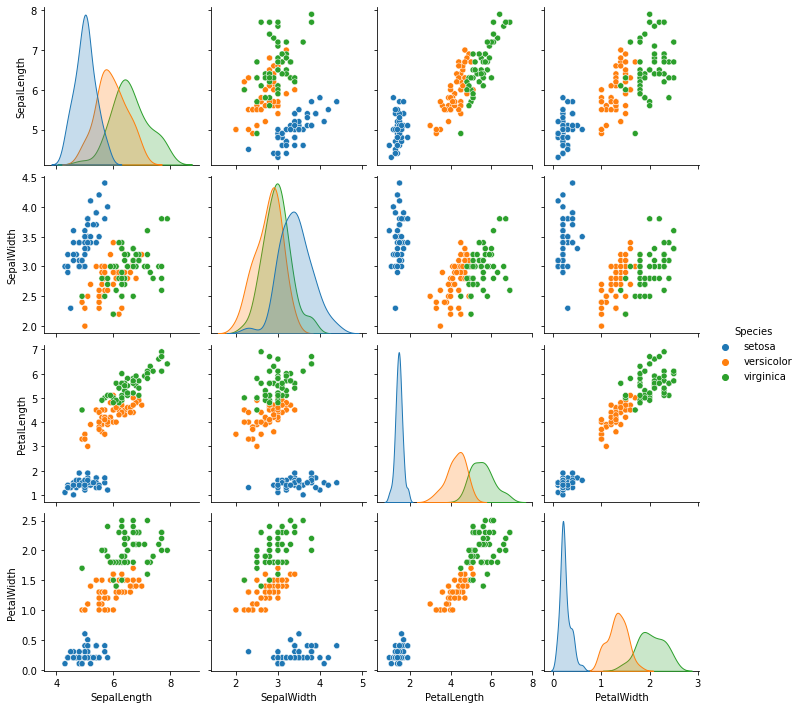

In [17]:
sns.pairplot(iris, hue='Species')

Observations :

1.SepalLength and SepalWidth are the most important features to identify flowers
2.Setosa can be easily identified but versicolor and virginica are always overlapping .

# Relationship exploration: Categorical Vs Continuous -- Box Plots

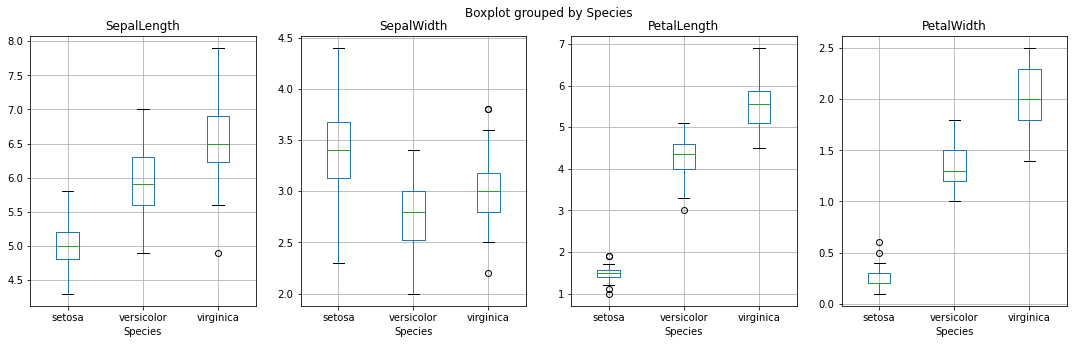

In [18]:
continuouscols=['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']
import matplotlib.pyplot as plt
fig,plotcanvas=plt.subplots(nrows=1,ncols=len(continuouscols),figsize=(18,5))
for predictor,i in zip(continuouscols,range(len(continuouscols))):
    iris.boxplot(column=predictor,by='Species',figsize=(5,5),vert=True,ax=plotcanvas[i])

# Looking at the distribution of Target variable

<AxesSubplot:xlabel='Species'>

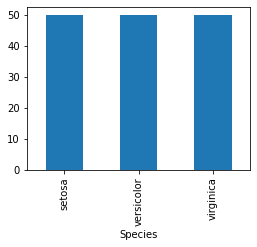

In [19]:
%matplotlib inline
# Creating Bar chart as the Target variable is Categorical
GroupedData=iris.groupby('Species').size()
GroupedData.plot(kind='bar', figsize=(4,3))

The data distribution of the target variable is satisfactory to proceed further. There are sufficient number of rows for each category to learn from.

# Selecting final predictors for Machine Learning

In [20]:
SelectedColumns=['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']

DataForML= iris[SelectedColumns]
DataForML.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [21]:
DataForML.to_pickle('DataForML.pkl')

In [22]:
DataForML_Numeric=pd.get_dummies(DataForML)
DataForML_Numeric.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [23]:
DataForML_Numeric['Species']=iris['Species']

In [24]:
DataForML_Numeric.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Splitting The Data Into Training and Testing Data

In [25]:
TargetVariable='Species'
Predictors=['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']

In [26]:
X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


# Standardization Of The Data

In [27]:
###Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
  
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)


# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [28]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(105, 4)
(105,)
(45, 4)
(45,)


# Training Our Decision Tree Algorithm

In [29]:
#Decision Trees
from sklearn import tree
#choose from different tunable hyper parameters
clf = tree.DecisionTreeClassifier(max_depth=5,criterion='gini')

# Printing all the parameters of Decision Trees
print(clf)

# Creating the model on Training Data
DTree=clf.fit(X_train,y_train)
prediction=DTree.predict(X_test)

DecisionTreeClassifier(max_depth=5)


# Comparing the actual and predicted flower classification

In [30]:
ds = pd.DataFrame({'Actual': y_test, 'Predicted': prediction})  
ds

,Actual,Predicted
0,virginica,virginica
1,versicolor,versicolor
2,setosa,setosa
3,virginica,virginica
4,setosa,setosa
5,virginica,virginica
6,setosa,setosa
7,versicolor,versicolor
8,versicolor,versicolor
9,versicolor,versicolor


# Predicting the Right Class if new data to this classifier

Now we make some individual predictions

In [31]:
NewData=pd.DataFrame(data=[[5.1, 3.5, 3.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.7, 3.2, 6.3, 2.2],
       [4.6, 3.1, 1.5, 0.2],[5.7, 2.0, 4.2, 1.2],[5.8, 4.0, 1.2, 0.2],[5.1, 3.5, 1.4, 0.8],[5.5, 2.3, 4.0, 1.3],[5.5,2.3,4.0,1.3],[5.1,3.8,1.6,0.7]], columns=Predictors)
NewData

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,3.4,0.2
1,4.7,3.2,1.3,0.2
2,4.7,3.2,6.3,2.2
3,4.6,3.1,1.5,0.2
4,5.7,2.0,4.2,1.2
5,5.8,4.0,1.2,0.2
6,5.1,3.5,1.4,0.8
7,5.5,2.3,4.0,1.3
8,5.5,2.3,4.0,1.3
9,5.1,3.8,1.6,0.7


In [32]:
new_X=NewData.values
new_X

array([[5.1, 3.5, 3.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.7, 3.2, 6.3, 2.2],
       [4.6, 3.1, 1.5, 0.2],
       [5.7, 2. , 4.2, 1.2],
       [5.8, 4. , 1.2, 0.2],
       [5.1, 3.5, 1.4, 0.8],
       [5.5, 2.3, 4. , 1.3],
       [5.5, 2.3, 4. , 1.3],
       [5.1, 3.8, 1.6, 0.7]])

In [33]:
Predictedvalues=DTree.predict(new_X)
Predictedvalues

array(['virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica'],
      dtype=object)

In [34]:
 def predictflower(inpData):
    new_X=NewData.values
    pred=DTree.predict(new_X)
    inpData['Prediction']=pred
    return(inpData)

In [35]:
predictflower(inpData=NewData)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Prediction
0,5.1,3.5,3.4,0.2,virginica
1,4.7,3.2,1.3,0.2,virginica
2,4.7,3.2,6.3,2.2,virginica
3,4.6,3.1,1.5,0.2,virginica
4,5.7,2.0,4.2,1.2,virginica
5,5.8,4.0,1.2,0.2,virginica
6,5.1,3.5,1.4,0.8,virginica
7,5.5,2.3,4.0,1.3,virginica
8,5.5,2.3,4.0,1.3,virginica
9,5.1,3.8,1.6,0.7,virginica


# Plotting The Decision tree

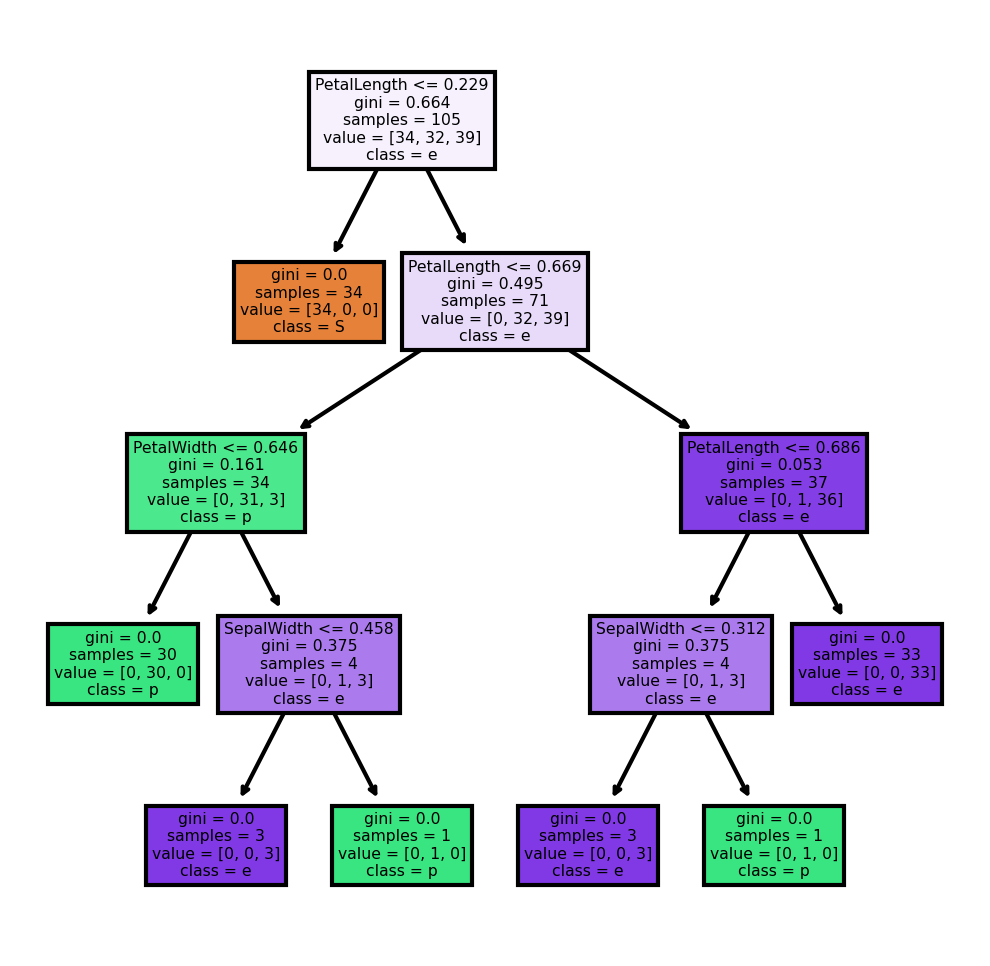

In [36]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)

tree.plot_tree(clf, feature_names = Predictors, class_names = TargetVariable, filled = True);

In [37]:
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       1.00      0.94      0.97        18
   virginica       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



# Observing The Confusion Matrix

In [38]:
print(metrics.confusion_matrix(y_test, prediction))

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


# Accuracy Of The Model

In [39]:
# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score
Accuracy_Values=cross_val_score(DTree, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

Accuracy of the model on Testing Sample Data: 0.98

Accuracy values for 10-fold Cross Validation:
 [1.         0.93265993 1.         0.93265993 0.93265993 0.86666667
 0.93265993 0.93265993 1.         1.        ]

Final Average Accuracy of the model: 0.95


# Plotting the feature importance chart for the most important columns

<AxesSubplot:>

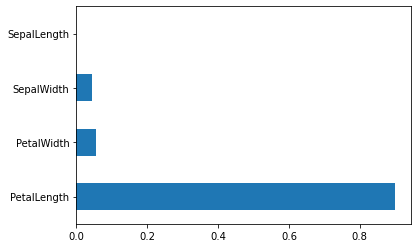

In [40]:
# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DTree.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

Thank You!